# Problem set 4: Analyzing data

In [ ]:
#Husk at inplace sørger for at ting bliver slettet og ændret for hele programmet. Ellers kopiers der en ekstra fil.

In [46]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import pandas as pd
import pydst
dst = pydst.Dst(lang='en')

# Tasks

## Import national account data from Denmark Statistics

Consider the following dictionary definitions:

In [47]:
columns_dict = {}
columns_dict['TRANSAKT'] = 'variable'
columns_dict['PRISENHED'] = 'unit'
columns_dict['TID'] = 'year'
columns_dict['INDHOLD'] = 'value'

var_dict = {} # var is for variable
var_dict['P.1 Output'] = 'Y'
var_dict['P.3 Final consumption expenditure'] = 'C'
var_dict['P.3 Government consumption expenditure'] = 'G'
var_dict['P.5 Gross capital formation'] = 'I'
var_dict['P.6 Export of goods and services'] = 'X'
var_dict['P.7 Import of goods and services'] = 'M'

unit_dict = {}
unit_dict['2010-prices, chained values'] = 'real'
unit_dict['Current prices'] = 'nominal'

**Step 1:** Download all of table `nah1`.

In [48]:
# hint, nah1 = dst.get_data(table_id = '?', variables={'TRANSAKT':[?], 'PRISENHED':[?], 'TID':[?]})

nah1 = dst.get_data(table_id = 'NAH1', variables={'TRANSAKT':['*'], 'PRISENHED':['*'], 'TID':['*']})

**Step 2:** Rename the columns using `columns_dict` and replace data using `var_dict` and `unit_dict`.

In [49]:
# hint, nah1_true.rename(?,inplace=True)

nah1.rename(columns = columns_dict,inplace=True)
                 
for key,value in var_dict.items():
    nah1.variable.replace(key, value, inplace=True)

for key,value in unit_dict.items():
    nah1.unit.replace(key, value, inplace=True)

nah1.head(15)


,variable,unit,year,value
0,D.21 Taxes on products,real,1976,157000
1,D.21 Taxes on products,nominal,1976,36033
2,D.21-D.31 Taxes less subsidies on products,real,1976,149461
3,D.21-D.31 Taxes less subsidies on products,nominal,1976,30576
4,D.31 Subsidies on products,real,1976,7921
5,D.31 Subsidies on products,nominal,1976,5458
6,Y,real,1976,1481439
7,Y,nominal,1976,454294
8,P.11+P.12+P.131 Market output and output for o...,real,1976,..
9,P.11+P.12+P.131 Market output and output for o...,nominal,1976,..


**Step 3:** Only keep rows where the variable is in `[Y, C, G, I, X, M]`. Afterwards convert the `value` column to a float.

In [50]:
# write you code here
I = False
for key, value in var_dict.items():
    I = I | (nah1.variable == value)
nah1 = nah1[I]

nah1.value = nah1.value.astype('float')

**Step 4:** Discuss what the following summary statistics show.

In [51]:
nah1.groupby(['variable','unit']).describe()

year                                                     \
                 count    mean        std     min     25%     50%     75%   
variable unit                                                               
C        nominal  57.0  1994.0  16.598193  1966.0  1980.0  1994.0  2008.0   
         real     57.0  1994.0  16.598193  1966.0  1980.0  1994.0  2008.0   
G        nominal  57.0  1994.0  16.598193  1966.0  1980.0  1994.0  2008.0   
         real     57.0  1994.0  16.598193  1966.0  1980.0  1994.0  2008.0   
I        nominal  57.0  1994.0  16.598193  1966.0  1980.0  1994.0  2008.0   
         real     57.0  1994.0  16.598193  1966.0  1980.0  1994.0  2008.0   
M        nominal  57.0  1994.0  16.598193  1966.0  1980.0  1994.0  2008.0   
         real     57.0  1994.0  16.598193  1966.0  1980.0  1994.0  2008.0   
X        nominal  57.0  1994.0  16.598193  1966.0  1980.0  1994.0  2008.0   
         real     57.0  1994.0  16.598193  1966.0  1980.0  1994.0  2008.0   
Y        nominal  57.0  1994.0  16.598193  1966.0  1980.0  1994.0  2008.0   
         real     57.0  1994.0  16.598193  1966.0  1980.0  1994.0  2008.0   

                         value                                         \
                     max count          mean           std        min   
variable unit                                                           
C        nominal  2022.0  57.0  8.047424e+05  5.307765e+05    62576.0   
         real     2022.0  57.0  1.067348e+06  2.843046e+05   549491.0   
G        nominal  2022.0  57.0  2.731115e+05  1.882380e+05    14768.0   
         real     2022.0  57.0  3.738388e+05  1.041965e+05   171307.0   
I        nominal  2022.0  57.0  2.375771e+05  1.682620e+05    21134.0   
         real     2022.0  57.0  2.823898e+05  1.143072e+05   127630.0   
M        nominal  2022.0  57.0  4.680322e+05  4.040901e+05    24406.0   
         real     2022.0  57.0  5.031662e+05  3.357286e+05   112171.0   
X        nominal  2022.0  57.0  5.276742e+05  4.644961e+05    23110.0   
         real     2022.0  57.0  5.844853e+05  3.774875e+05   123594.0   
Y        nominal  2022.0  57.0  1.889688e+06  1.349894e+06   144582.0   
         real     2022.0  57.0  2.367640e+06  8.492730e+05  1089347.0   

                                                              
                        25%        50%        75%        max  
variable unit                                                 
C        nominal   322000.0   748365.0  1305931.0  1815557.0  
         real      847062.0  1040029.0  1343243.0  1556887.0  
G        nominal   105298.0   242403.0   452185.0   620143.0  
         real      310237.0   355506.0   473421.0   537877.0  
I        nominal    80672.0   186087.0   353247.0   687760.0  
         real      183220.0   236281.0   359370.0   566489.0  
M        nominal   132098.0   307210.0   789148.0  1634424.0  
         real      213097.0   363124.0   803852.0  1213702.0  
X        nominal   130293.0   366045.0   895202.0  1922751.0  
         real      245273.0   475081.0   914933.0  1385573.0  
Y        nominal   677930.0  1603057.0  3093079.0  5216933.0  
         real     1615002.0  2210638.0  3198587.0  4008007.0

**Answer:** See A1.py

## Merge with population data from Denmark Statistics

Load population data from Denmark Statistics:

In [52]:
pop = dst.get_data(table_id = 'FT', variables={'HOVEDDELE':['*'], 'TID':['*']})
pop.rename(columns={'TID':'year','INDHOLD':'population'},inplace=True)
I = pop.HOVEDDELE == 'All Denmark'
pop =  pop.loc[I,['year','population']]
pop.head()

,year,population
0,2010,5534738
2,1769,797584
3,1840,1289075
4,1860,1608362
5,1901,2449540


**Question 1:** Merge the population and the national account data, so there is a new column called `population`. Use the **merge function**.

In [53]:
# hint, merged = pd.merge(?,?,how='?',on=[?])
merged = pd.merge(nah1, pop, how='left',on=['year'])
                  
merged.tail(10)
#Forskel på tail og sample?

,variable,unit,year,value,population
674,C,real,2003,1205061.0,5383507.0
675,C,nominal,2003,1038529.0,5383507.0
676,G,real,2003,430025.0,5383507.0
677,G,nominal,2003,359734.0,5383507.0
678,I,real,2003,336613.0,5383507.0
679,I,nominal,2003,300593.0,5383507.0
680,X,real,2003,742669.0,5383507.0
681,X,nominal,2003,630409.0,5383507.0
682,M,real,2003,591557.0,5383507.0
683,M,nominal,2003,532780.0,5383507.0


**Answer:** See A2.py

**Question 2:** Merge the population on again, so there is a new column called `population_alt`. Use the **join method**.

In [54]:
pop_with_index = pop.set_index('year')
pop_with_index.rename(columns={'population':'population_alt'},inplace=True)
merged_with_index = merged.set_index('year')
merged_alt = merged_with_index.join(pop_with_index)
merged_alt.tail(10)

,variable,unit,value,population,population_alt
year,,,,,
2022,C,real,1516292.0,5873420.0,5873420.0
2022,C,nominal,1815557.0,5873420.0,5873420.0
2022,G,real,522697.0,5873420.0,5873420.0
2022,G,nominal,620143.0,5873420.0,5873420.0
2022,I,real,566489.0,5873420.0,5873420.0
2022,I,nominal,687760.0,5873420.0,5873420.0
2022,X,real,1385573.0,5873420.0,5873420.0
2022,X,nominal,1922751.0,5873420.0,5873420.0
2022,M,real,1213702.0,5873420.0,5873420.0


**Answer:** See A3.py

## Split-apply-combine-(plot)

Consider the following **split-apply-combine-plot:**

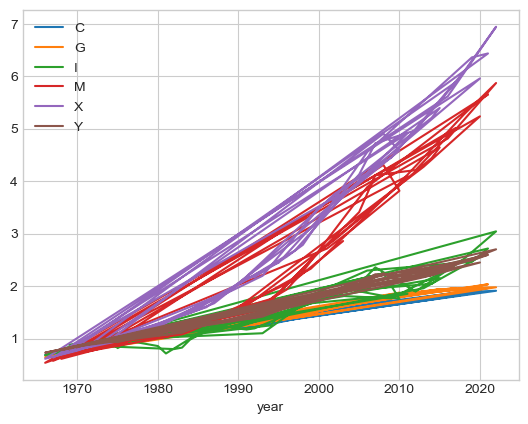

In [55]:
# a. split
nah1_grouped = nah1.groupby(['variable','unit'])
nah1_grouped_first = nah1_grouped.value.first()
nah1_grouped_first.name = 'first'

# b. apply
nah1.set_index(['variable','unit','year'],inplace=True)
nah1 = nah1.join(nah1_grouped_first,how='left',on=['variable','unit'])
nah1.reset_index(inplace=True)

# c. combine
nah1['indexed'] = nah1['value']/nah1['first']

# d. plot
def plot(df):
    df_indexed = df.set_index('year')
    I = df_indexed.unit == 'real'
    df_indexed[I].groupby(['variable'])['indexed'].plot(legend=True);
    
plot(nah1)

**Question** Implement the same split-apply-combine as above using `transform`.

In [ ]:
def first(x): # select the first element in a series
    return x.iloc[0]

# nah1_alt = nah1_final.copy()
# grouped = nah1_alt.groupby(?)
#nah1_alt[?] = ?.transform(lambda x: ?)
#nah1_alt.head()

**Answer:** See A4.py

# Problem: The Housing market


## Housing data

**Note:** The file `data/bm010_parcel.xlsx` has been downloaded from http://rkr.statistikbank.dk/201.

**Question:** Go through the cell below and ensure you understand ALL commands.

In [ ]:
# a. load data
prices = pd.read_excel('data/bm010_parcel.xlsx', skiprows=2)
prices.rename(columns={'Unnamed: 2': 'municipality'}, inplace=True)

# b. delete columns
del prices['Unnamed: 0']
del prices['Unnamed: 1']

# c. rename time columns: 1992K1 -> price19921
time_dict = {} 
for y in range(1992,2021+1): 
    for k in range(1,4+1): 
        str_from = f'{y}K{k}'
        str_to   = f'price{y}{k}'
        time_dict[str_from] = str_to
prices = prices.rename(columns = time_dict)        

# d. drop missing
prices = prices.dropna()

# e. convert to long
prices_long = pd.wide_to_long(prices, stubnames='price', i='municipality', j='year_quarter')
prices_long.reset_index(inplace=True)

# f. drop missing and convert to float
I = prices_long.loc[prices_long.price == '..']
prices_long.drop(I.index, inplace=True)
prices_long.price = prices_long.price.astype('float')

# g. create date variable
prices_long['d'] = (prices_long.year_quarter.astype(str).str[:4] # grab the year, first four digits
          + 'Q' # add the letter Q 
          + prices_long.year_quarter.astype(str).str[4]) # the quarter (fifth digit)
prices_long['date'] = pd.to_datetime(prices_long.d)

# h. cleanup 
del prices_long['year_quarter']
del prices_long['d']

prices_long.head()

## Population data

**Question:** Go through the cell below and ensure you understand ALL commands.

In [ ]:
# a. load data
pop = dst.get_data(table_id='FOLK1A', variables={'Alder':['IALT'], 'CIVILSTAND':['TOT'], 'Køn':['TOT'], 'Tid':['*'], 'OMRÅDE':['*']})

# b. drop and rename columns
for v in ['ALDER', 'CIVILSTAND', 'KØN']: 
    del pop[v]
pop = pop.rename(columns = {'INDHOLD':'population', 'OMRÅDE': 'municipality'})

# c. drop non-municipalities
for val in ['Region', 'All']: 
    I = pop['municipality'].str.contains(val)
    pop.drop(pop[I].index, inplace=True)

# d. convert to date
pop['date'] = pd.to_datetime(pop.TID)
del pop['TID']

pop.head()

## Analysis

**Problem:** Analyze the co-variation betwen population growth and house price growth. Reproduce the graphs below. 

**Hint:** For the second one consider the `agg` method (similar to but different from `transform`, Google it).

In [ ]:
# write your code here 

**Answer:** See A5.py for difference within total population. See A6.py for difference within municipality